# World Happiness Report 2023

The World Happiness Report 2023 explores various socio-economic factors influencing the well-being and contentment of nations across the globe. With data analysis and visualization tools, this project aims to unravel patterns, trends, and correlations within the dataset to offer insights into what contributes to a nation's happiness.

Comparing life satisfaction, GDP per capita, health, freedom, generosity, and views of corruption, whilst using Python libraries pandas, seaborn, and scikit-learn, a visual analysis is undertaken, which covers a large number of nations over many years. This project is driven by several overarching goals:

Data Exploration and Cleaning: The dataset stored in csv format is accessed, and a DataFrame created using the pandas library. Subsequently, the set is checked for duplicate rows. Before each visualisation, the missing values in the particular columns queried are deleted. In the last visualisation of the project, a machine-learning library is incorporated to impute a missing value from a sample of of a column.

Insights Generation: Ultimately, the aim here is to distill meaningful insights from the data, shedding light on the factors that contribute to national happiness. By combining data analysis with domain knowledge, policymakers, researchers, and stakeholders interested in fostering well-being and prosperity should be able to derive insight from these plots.

In [22]:
import csv
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### Accessing data in CSV, using pandas to create a DataFrame

In [23]:
data = pd.read_csv('whr.csv')

### Investigating missing values

In [24]:
print(data.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64


### Checking for duplicated rows

In [25]:
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


#### Having ascertained that there are no duplicate rows in the data, the only substantial concern would be missing values in the dataset. For the time being, missing values will be deleted in each column to be queried

In [26]:
sns.set(style="dark")

### Selecting some countries to compare

In [27]:
selected_countries = ['Afghanistan', 'France', 'Nigeria', 'Singapore', 'Syria','United Kingdom', 'Norway']

### Removing nulls from column values

In [28]:
data_cleaned = data.dropna(subset = 'Perceptions of corruption')

In [29]:
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]

### Scatterplot using multiple values (years) for each country

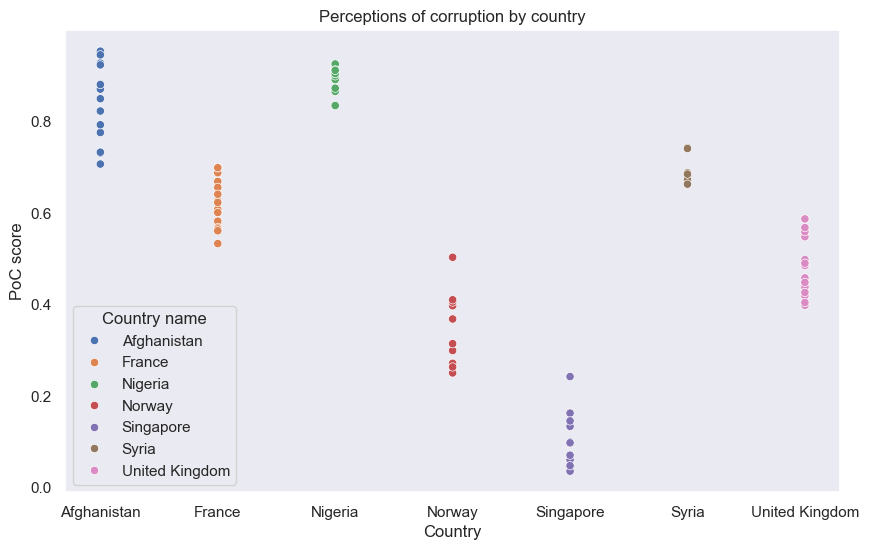

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country name', y='Perceptions of corruption', hue='Country name', data=filtered_data)
plt.title('Perceptions of corruption by country')
plt.xlabel('Country')
plt.ylabel('PoC score')
plt.show()

### Two variables with data averaged by country, including a linear regression


In [31]:
data_cleaned = data.dropna(subset = 'Healthy life expectancy at birth')
selected_countries = ['Bangladesh','Benin', 'Canada', 'Japan', 'Nepal', 'Poland', 'Iraq', 'Switzerland', 'Spain', 'Venezuela']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
mean_data = filtered_data.groupby('Country name').mean().reset_index()

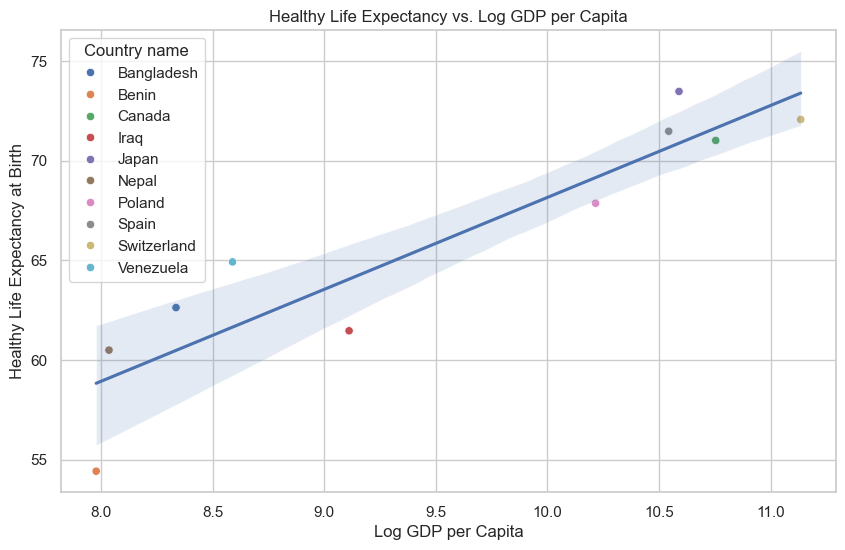

In [32]:
sns.set(style="whitegrid")
# Visualization code with blobs for each column
plt.figure(figsize=(10, 6))
# Scatter plot
sns.scatterplot(x='Log GDP per capita', y='Healthy life expectancy at birth', hue='Country name', data=mean_data)
sns.regplot(x='Log GDP per capita', y='Healthy life expectancy at birth', data=mean_data, scatter=False)
plt.title('Healthy Life Expectancy vs. Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy at Birth')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

### Using all rows to plot a heatmap

In [33]:
data_cleaned = data.dropna(subset=['Freedom to make life choices', 'Log GDP per capita'])

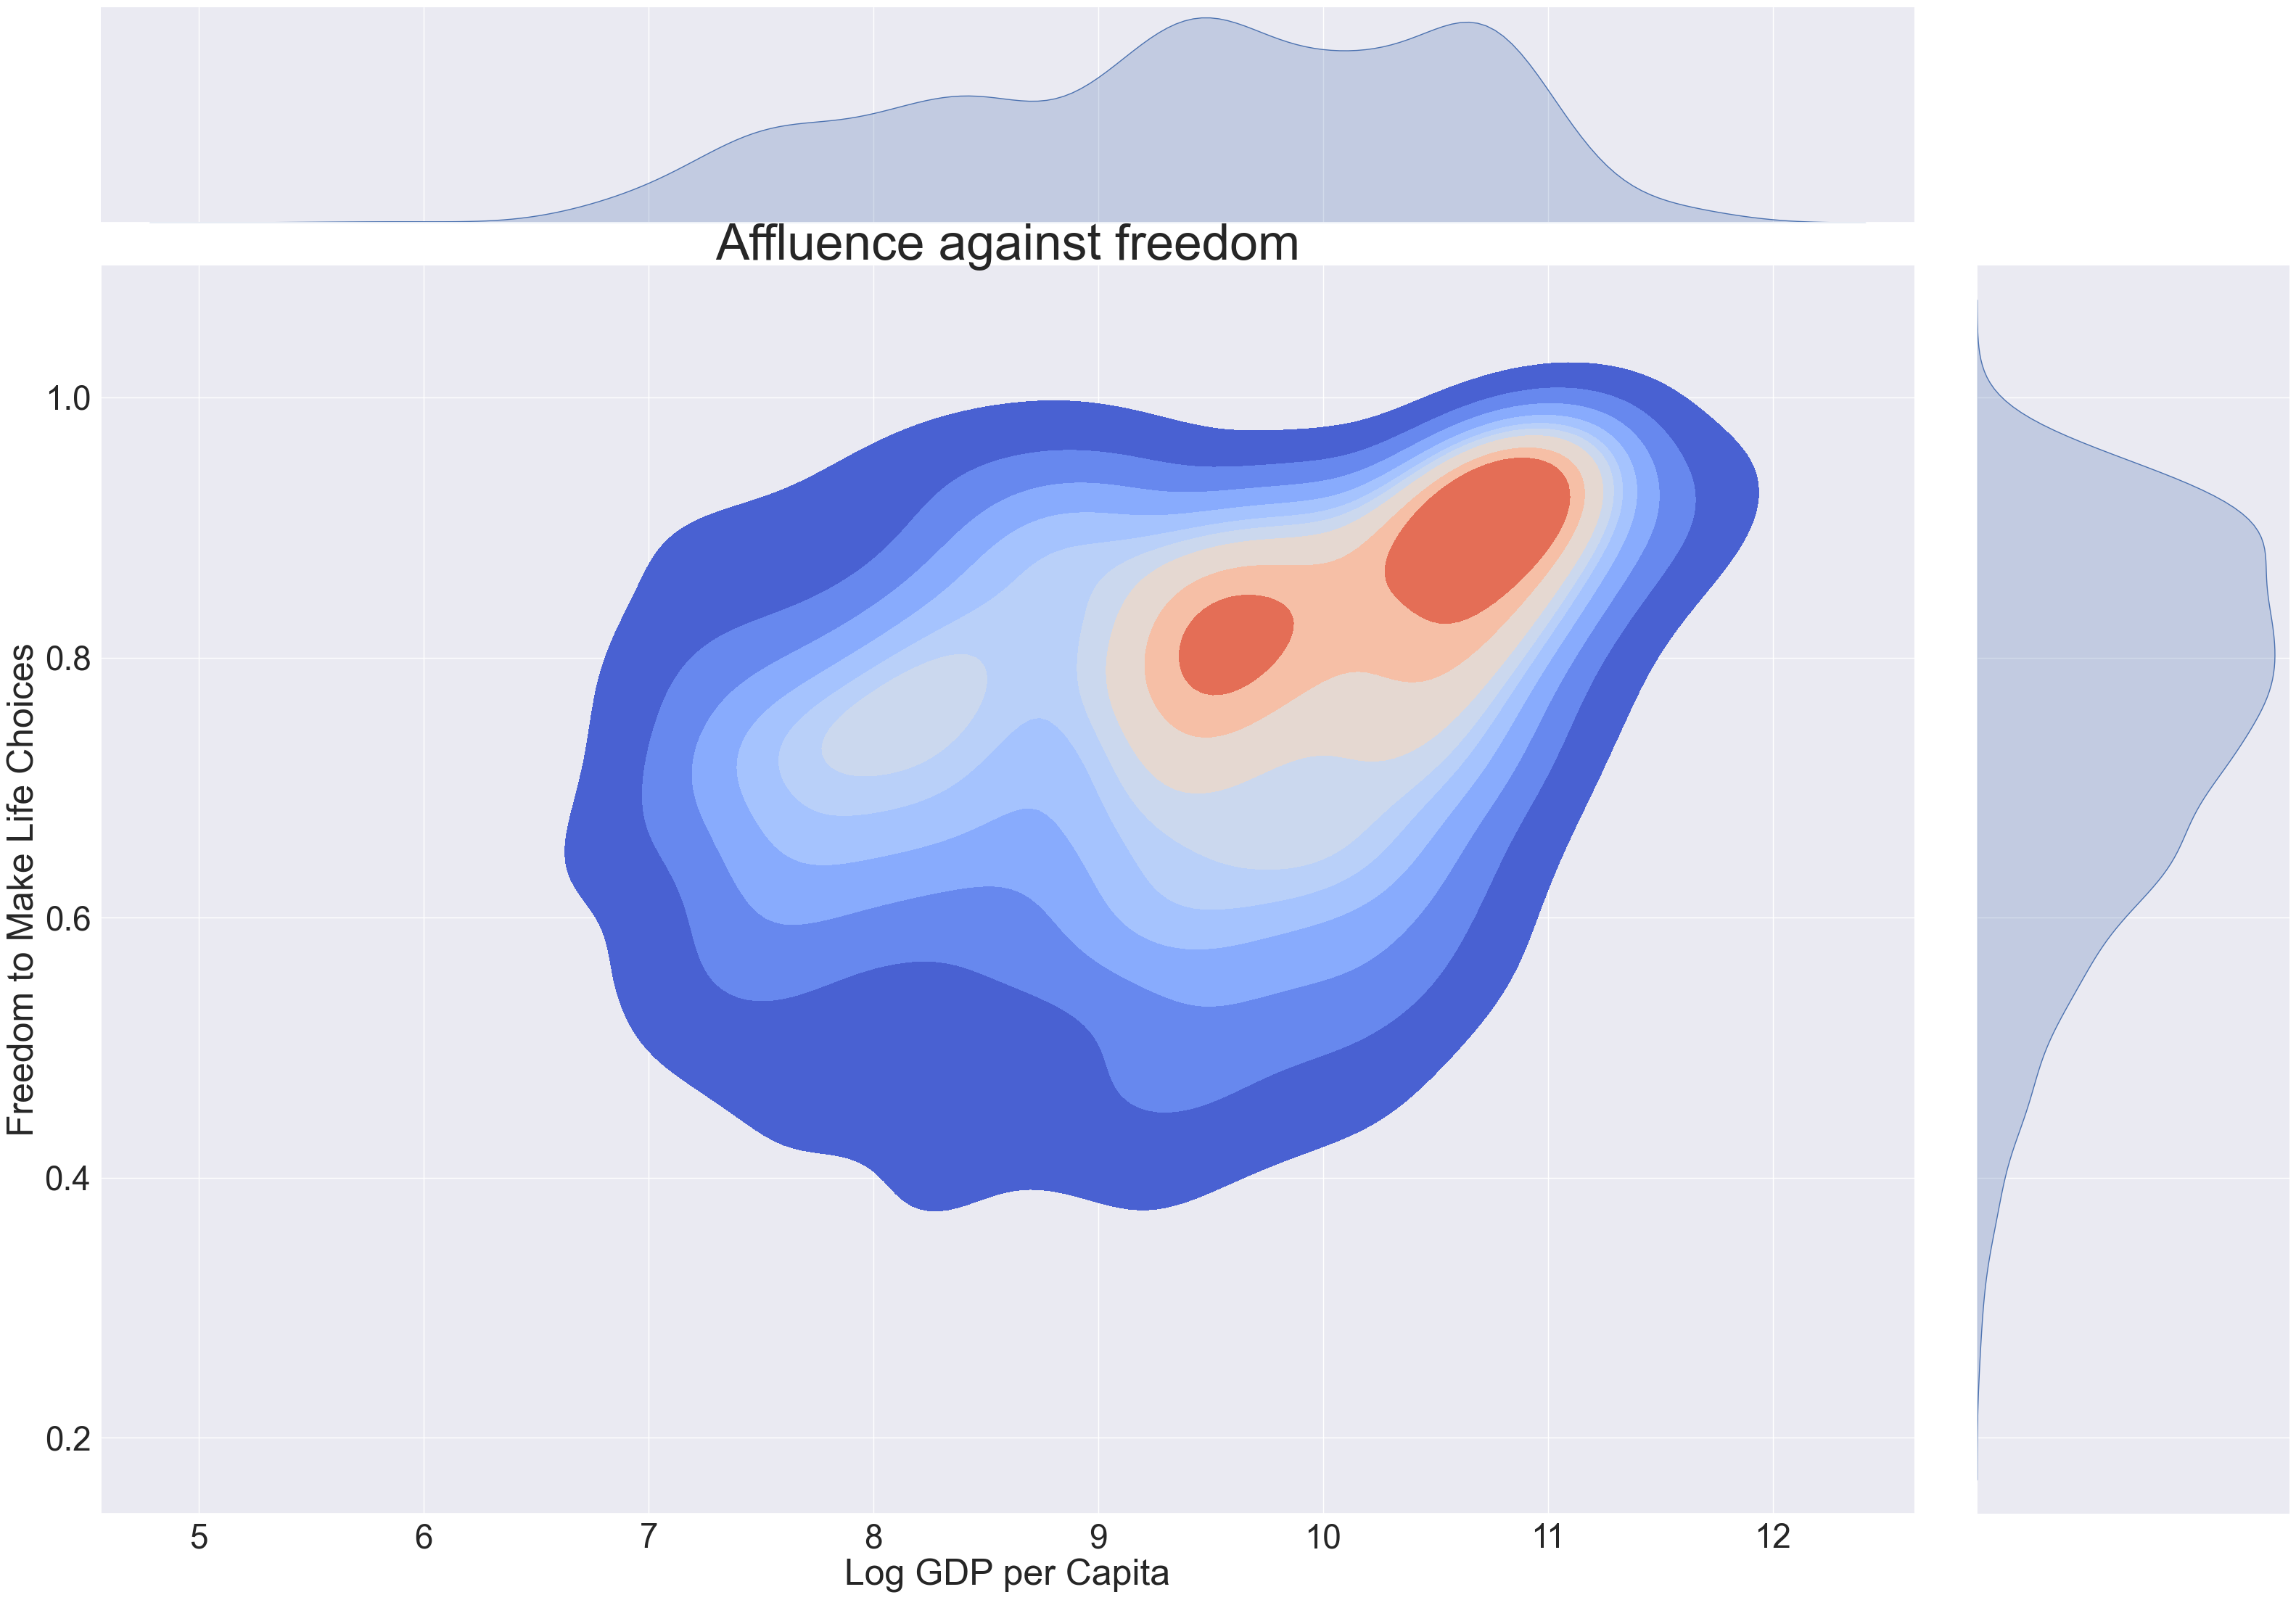

In [34]:
sns.set(style="whitegrid")
sns.set(font_scale=3)
p=sns.jointplot(x=data_cleaned['Log GDP per capita'], y=data_cleaned['Freedom to make life choices'], height=16, kind='kde', cmap='coolwarm', fill=True).set_axis_labels('Log GDP per Capita', 'Freedom to Make Life Choices')
plt.title("Affluence against freedom", fontsize=50)
plt.subplots_adjust(top=1.4)
plt.subplots_adjust(right=2)
plt.show()

### Non-linear regression showing life ladder against wealth

In [35]:
data_cleaned = data.dropna(subset = ['Life Ladder', 'Log GDP per capita'])
mean_data = data_cleaned.groupby('Country name').mean().reset_index()
print(type(mean_data))

<class 'pandas.core.frame.DataFrame'>


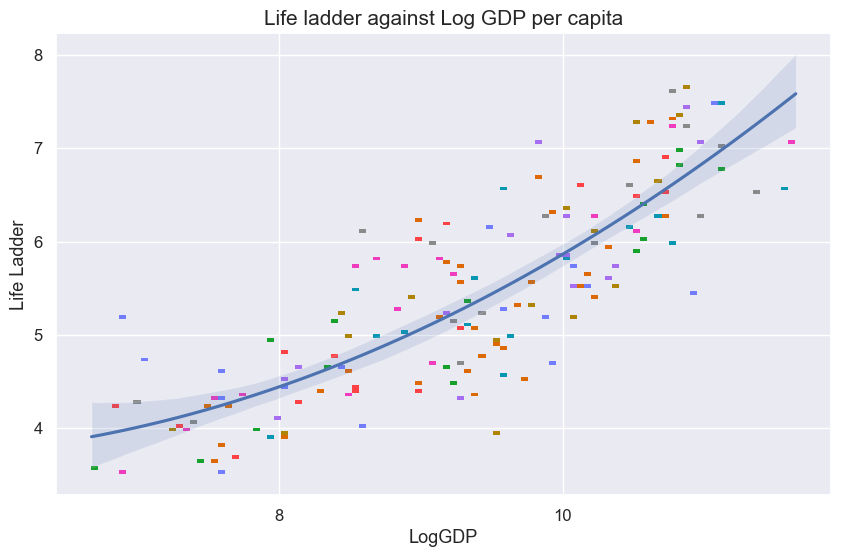

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(x=round(mean_data['Log GDP per capita'], 2), y=mean_data['Life Ladder'], bins = 100, palette='bright', hue=mean_data['Country name'], legend=None)
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=mean_data, scatter=False, order=2)
plt.xlabel('LogGDP', fontsize=13)
plt.ylabel('Life Ladder', fontsize=13)
plt.title('Life ladder against Log GDP per capita', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Changing country name from 'United Arab Emirates' to 'UAE'

In [37]:
data_cleaned = data.dropna(subset = ['Log GDP per capita'])
selected_countries = ['Azerbaijan','Brazil', 'Egypt', 'Guatemala', 'Jamaica', 'Mexico', 'Netherlands', 'Peru', 'Russia', 'Slovakia', 'Thailand', 'United Arab Emirates']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
# Check if 'United Arab Emirates' exists in the 'Country name' column
if 'United Arab Emirates' in filtered_data['Country name'].values:
    # Replace 'United Arab Emirates' with 'UAE' using .loc
    filtered_data.loc[filtered_data['Country name'] == 'United Arab Emirates', 'Country name'] = 'UAE'
mean_data = filtered_data.groupby('Country name').mean().reset_index()

### Demonstrating apparently random correlation between wealth and generosity

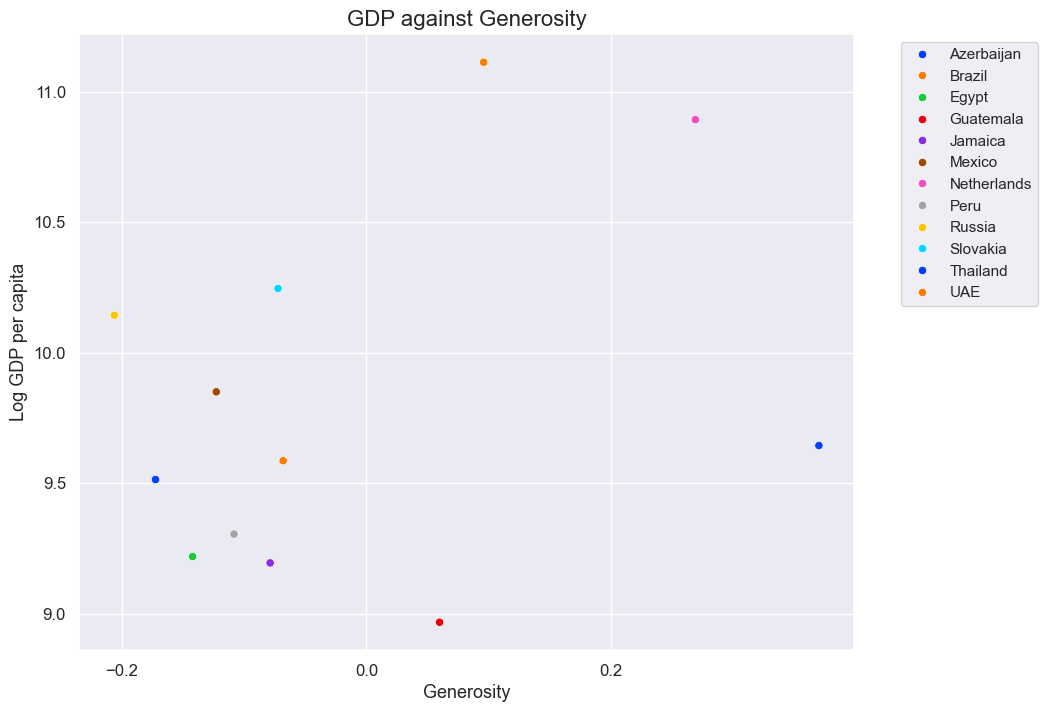

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mean_data['Generosity'], y=mean_data['Log GDP per capita'], palette='bright', hue=mean_data['Country name'])
plt.xlabel('Generosity', fontsize=13)
plt.ylabel('Log GDP per capita', fontsize=13)
plt.title('GDP against Generosity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.show()

### Violinplot showing spread of life ladder across whole dataset

<Axes: xlabel='Life Ladder'>

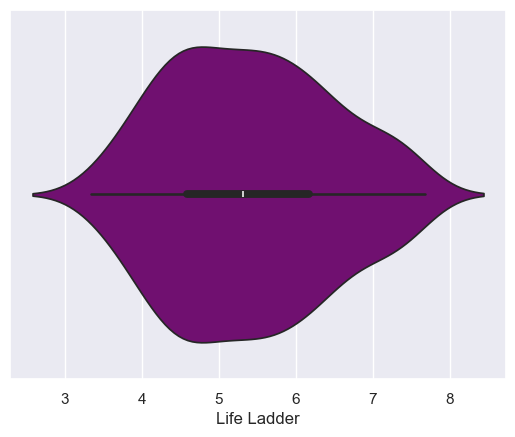

In [39]:
data_cleaned = data.dropna(subset = ['Life Ladder'])
mean_data = data_cleaned.groupby('Country name').mean().reset_index()
sns.set(font_scale=1)
sns.violinplot(x=mean_data['Life Ladder'], color = 'purple')


### Violinplots showing life expectancy across a selection of countries

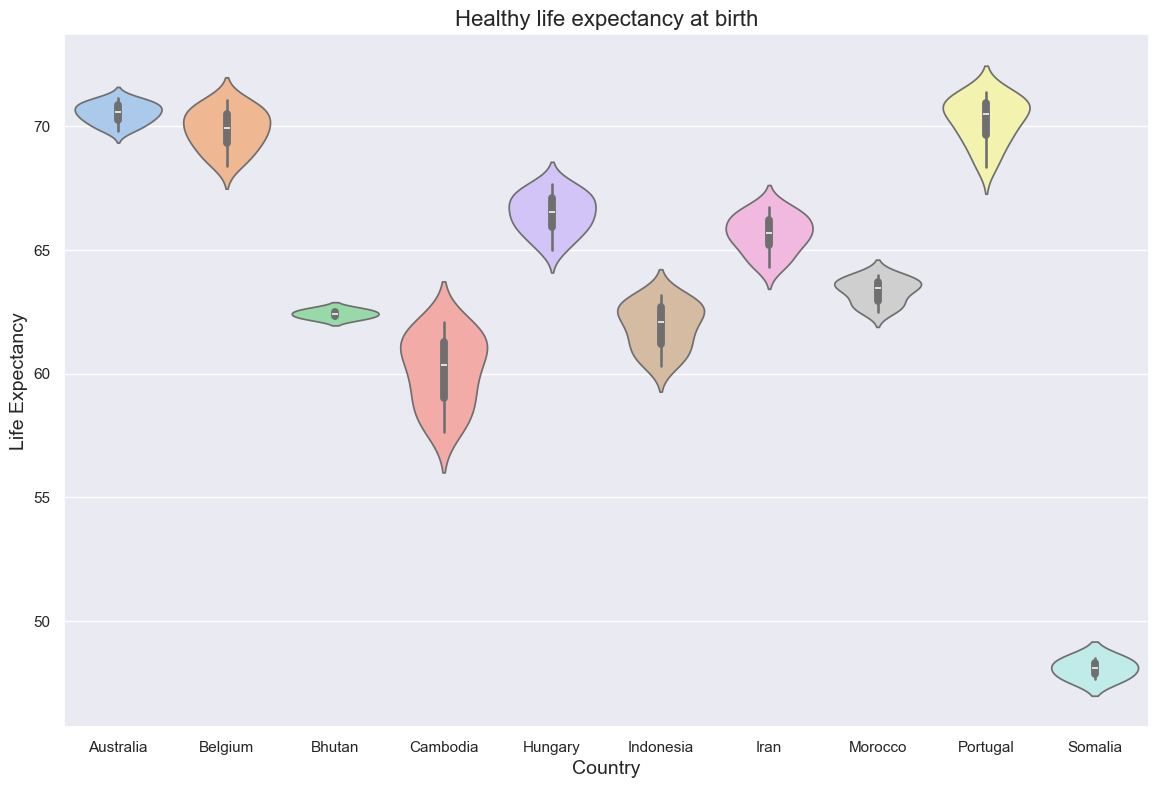

In [40]:
soft_colors_list = ['#E6E6FA', '#FFE4E1', '#F0F8FF', '#FFF5EE', '#FAF0E6', '#F0FFF0', '#FFEFD5', '#F0E68C', '#FFF8DC', '#F5F5DC']
selected_countries = ['Bhutan','Belgium', 'Cambodia', 'Hungary', 'Somalia', 'Indonesia', 'Iran', 'Australia', 'Portugal', 'Morocco']
pastel_palette = sns.color_palette("pastel")
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
plt.figure(figsize=(14, 9))
ax = sns.violinplot(x=filtered_data['Country name'], hue=filtered_data['Country name'], y=filtered_data['Healthy life expectancy at birth'], palette="pastel")
ax.set_title("Healthy life expectancy at birth", fontsize=16)
ax.set_ylabel("Life Expectancy", fontsize=14)
ax.set_xlabel("Country", fontsize=14)
plt.show()

### Ridgeplot showing life ladder by country

Text(0.5, 0.98, 'Life Ladder by country')

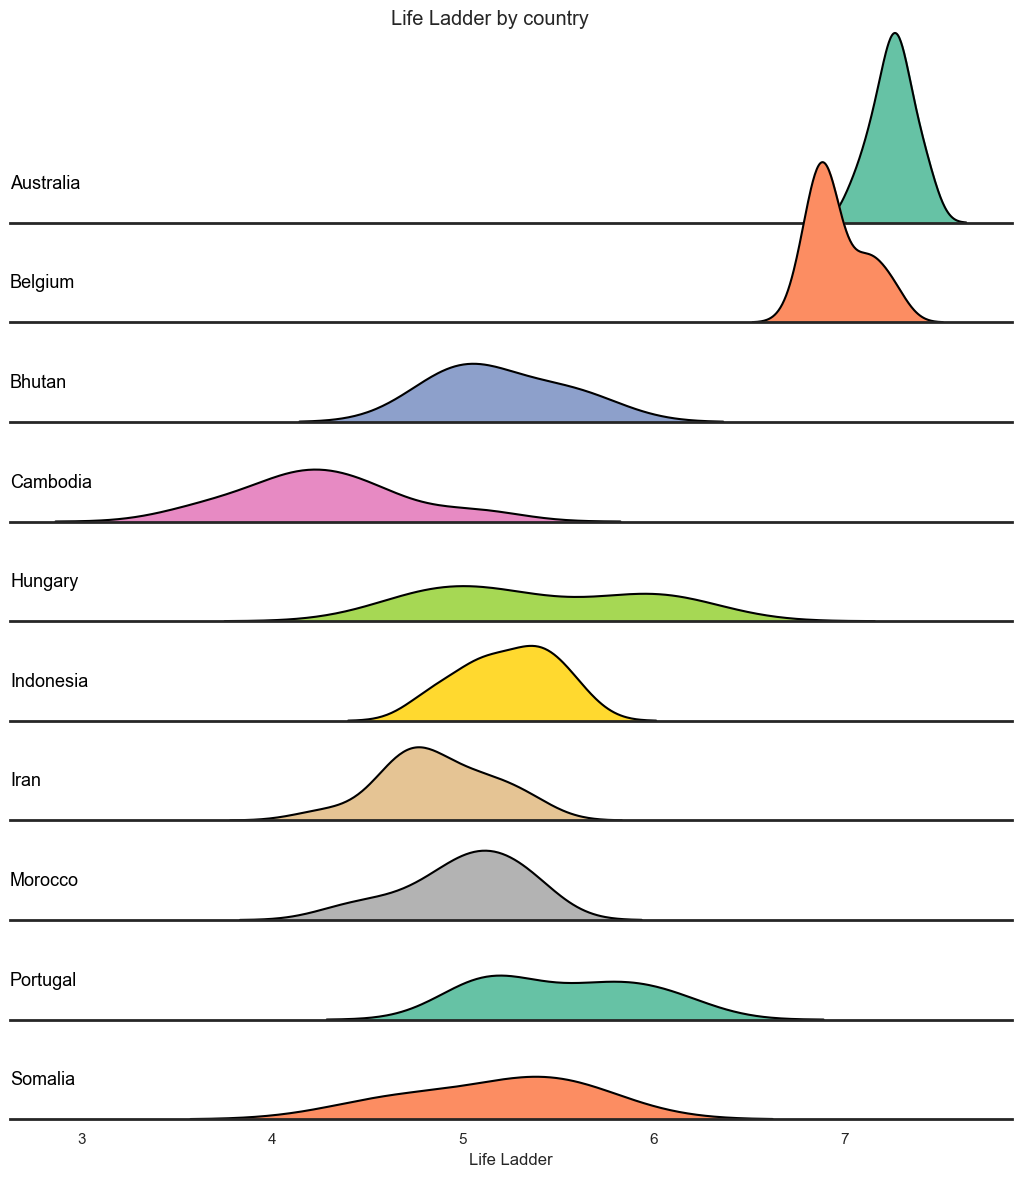

In [41]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(filtered_data, row="Country name", palette=palette, hue="Country name", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Life Ladder", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Life Ladder", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Country name")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], ylabel=None, xlabel="Life Ladder")
g.despine( left=True)
plt.suptitle('Life Ladder by country', y=0.98)

#### Whilst deleting missing values from columns have been used here as a quick fix, a far better solution might be to impute replacement values. In the example below I show how part of the Python scikit-learn library can be exploited to calculate suitable figures. The technology works by using k-Nearest Neighbors, he mean value from n_neighbors nearest neighbors found in the training set.

### Imputation for missing 2022 value in Afghanistan data

Imputed value for the missing entry (to 3 sig figs): 7.586


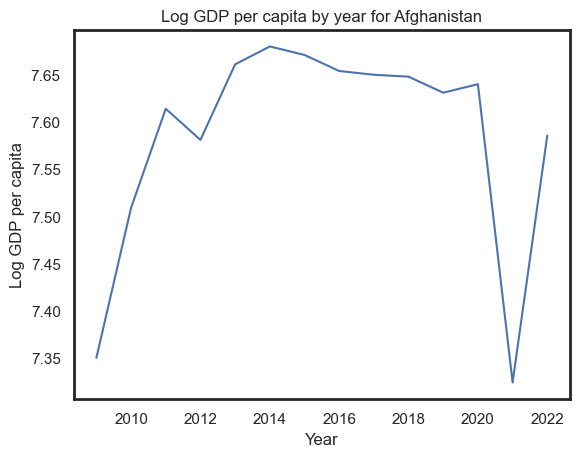

In [42]:
nan = np.nan
X = np.array([7.35, 7.509, 7.614, 7.581, 7.661, 7.68, 7.671, 7.654, 7.65, 7.648, 7.631, 7.64, 7.324, nan]).reshape(-1,1)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
x_imputed = imputer.fit_transform(X)
# Round the imputed value to three significant figures
imputed_value = round(x_imputed[-1][0], 3)
# Print the imputed value
print("Imputed value for the missing entry (to 3 sig figs):", imputed_value)
years = np.arange(2009, 2023)
sns.lineplot(x=years, y=x_imputed.flatten())
plt.xlabel('Year')
plt.ylabel('Log GDP per capita')
plt.title('Log GDP per capita by year for Afghanistan')
plt.show()

To conclude, this analysis has yielded some significant insights. Through visualisation, various socio-economic factors and their implications on life satisfaction have been explored, ultimately providing a clue into what contributes to a nation's overall happiness.

One notable finding from this work is the observation of a strong correlation between GDP per capita and life satisfaction. Countries with higher GDP per capita tend to exhibit higher levels of life satisfaction, suggesting a significant role of economic prosperity in fostering happiness. However, it's crucial to note that this correlation is not absolute, and other factors such as social support, health, and freedom also play pivotal roles. A similar pattern can be observed plotting life expectancy against happiness. The charts have also highlighted the impact of societal perceptions of corruption on happiness. Nations with lower levels of perceived corruption tend to report higher levels of life satisfaction, indicating the importance of transparency and good governance in promoting well-being. The realtionship of generosity with wealth is less clear - While there appears to be a positive correlation between GDP per capita and generosity in some countries, this is not consistent across the board, and appears generally somewhat random.

Overall, this brief analysis implies that the multifaceted nature of happiness can be complex. While economic prosperity certainly plays a significant role, it is not the sole determinant of happiness. The insights gained here could serve as valuable inputs for anyone seeking to promote happiness and well-being at both national and global levels. By understanding the complex interplay of factors influencing happiness, we can work towards creating societies that prioritize the holistic well-being of their citizens, thereby fostering a happier and more prosperous world.